<h1 style="text-align: center; font-size: 36px;">Phase Model</h1>
A phase function $\Theta(x)$ defined by isochrons of an attracting limit cycle x can be used to define the infinitesimal phase response curve(iPRC). Indeed, given such $\Theta(x)$, we can apply an arbitrarily small voltage perturbation y along the limit cycle. By definition of the PRC, we have
\begin{equation}
\Delta \phi = \Theta(x + y) - \Theta(x) = \nabla_x \Theta(x)y
\end{equation}
is our iPRC if we ignore the higher order terms using the assumption of small voltage pertubation y. Let $Z(\phi) = \nabla_x\Theta(x)$.

Let $A(t) = D_x F(x)\bigg\rvert_{x_o}$, where $x_o$ is our limit cycle. We can use $A(t)$ to define a linear differential operator $L = \frac{d}{dt} - A(t)$, and the matrix adjoint to this differential equation is $-A(t)^T$ with a linear differential operator $L^* = \frac{d}{dt} + A(t)^T$. Since the phase is asymptotic in the neighborhood of attraction of x, then we can say the derivative of phase with respect to time is zero, and the phase by defintion of $\Delta \phi$ is $Z(t)y(t)$. Therefore, we have
\begin{equation}
0 = \frac{d}{dt}Z(t)y(t) \Rightarrow (L^*Z)(t) = 0
\end{equation}
Moreover, since $\phi = \Theta(x(\phi))$, differentiating both sides with respect to $\phi$ gives $Z(\phi) \cdot \frac{dx(\phi)}{d\phi} = 1$. The above equation and this differential equation together defines a unique solution. The above iPRC derivation is from $\href{https://link.springer.com/book/10.1007/978-0-387-87708-2}{\text{Mathematical Foundation of Neuroscience by G. Bard Ermentrout , David H. Terman}}$, but trying to say them in my own words more concisely.


<h1 style="text-align: center; font-size: 36px;">Phase Model for Izhikevich Neuron</h1>
<ul>
  <li>1. Linearized System</li>
    From our previous bifurcation analysis, we have
    \begin{aligned}
        A(t) &= \begin{bmatrix} \dfrac{k(2v(t) - v_t - v_r)}{C} & \dfrac{-1}{C} \\ ab & a \\ \end{bmatrix}
    \end{aligned}
    and $L = \dfrac{d}{dt} - A(t)$, and its adjoint linear differential operator is $L^* = \dfrac{d}{dt} + A(t)^T$, where
    \begin{equation}
        {A(t)}^T = \begin{bmatrix} \dfrac{k(2v(t) - v_t - v_r)}{C} & ab \\ \dfrac{-1}{C} & a \\ \end{bmatrix}
    \end{equation}
    Then the linear differential equation defined by $L^*$ on vector $Z(t) = \begin{bmatrix} Z^v & Z^u \end{bmatrix}^T$, where $Z^v$ corresponds to the voltage, and $Z^u$ corresponds to the current, is the following:
    \begin{align*}
    \dfrac{dZ}{dt} &= \begin{bmatrix} \dfrac{-k(2\bar{v} - v_t - v_r)}{C} & -ab \\ \dfrac{1}{C} & -a \\ \end{bmatrix} Z \\
    \begin{bmatrix} \dfrac{dZ^v}{dt} \\ \dfrac{dZ^u}{dt} \end{bmatrix} &= \begin{bmatrix} \dfrac{-k(2\bar{v} - v_t - v_r)}{C}Z^v - abZ^u \\ \dfrac{Z^v}{C} - aZ^u \end{bmatrix} \\
    \end{align*}
     where $\bar{v}, \bar{u}$ are asymptotically stable limit cycles over multiple period T.
  <li>2. Compuation of Adjoint Linear Differential System using Backward Euler Method</li>
    To obtain the limit cycle, we can use the backward Euler method, which is feasible in the case of linear differential equation. Most importantly, numerical damping exists in backward Euler method, and will get rid of the transient of the solution except the periodic orbit. Therefore, we need to keep the Izhikevich Neuron in regular firing model, and choose $b \in [-2, 5]$. We may choose more general values of b in later case after experimenting the model with backward euler.<br>
    Backward Euler Method: 
    \begin{equation}
    y_{n+1} = y_{n} + h f(t_{n + 1}, y_{n + 1})
    \end{equation}
    Applied to our linear DE is
    \begin{aligned}
    y_{n + 1} &= y_{n} + h A y_{n + 1} \\
    y_{n + 1} - hAy_{n+1} &=  y_n \\
    (I_{n\times n} - hA) y_{n + 1} &= y_n \\
    y_{n + 1} &= (I_{n \times n} - hA)^{-1}y_n \\
    \end{aligned}
    Replacing A with $-A(t)^T$, we have
    \begin{equation}
    y_{n + 1} = (1 + hA^T)^{-1}y_n \\
    \end{equation}
    Note: the backward method usually works for continuous system, however, for discontinuous system, we still need to try to see if it works. 
    
  <li>3 $Z(\phi)\cdot\frac{dx(\phi)}{d\phi} = 1$ </li>
  In here, we follow the same approach from the paper $\href{https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1002478}{\text{Impact of adaptation currents on synchronization of coupled exponential integrate-and-fire neurons}}$.<br> For the normalization condition, note that 
  \begin{aligned}
  Z(\phi)\cdot\frac{d\bar{x}(\phi)}{d\phi} &= Z(\phi)\cdot f(\bar{x}(\phi)) \\
  \text{Choose } \phi = 0 &\Rightarrow Z(0) \cdot f(\bar{x}(0)) = 1 \\
  \end{aligned}
  Since the Izhikevich Neuron is discontinuous, we need to account for that by imposing the condition 
  \begin{align*}
  Z(0) &= BZ(T^-) \\
  \text{with } B &= (\dfrac{d\bar{v}}{dt}(0))^{-1}) \begin{bmatrix} \dfrac{d\bar{v}}{dt}(T^-) & \dfrac{d\bar{u}}{dt}(T^-) - \dfrac{d\bar{u}}{dt}(0) \\ 
                                                               0 & \dfrac{d\bar{v}}{dt}(0) \end{bmatrix}
  \end{align*}
  where $\bar{v}, \bar{u}$ are asymptotically stable limit cycles over multiple period T. We choose $\bar{v}(0) = c$, the reset, and $\bar{v}(T^-) = v_{\text{peak}}$, the voltage threshold. Indeed, we take only the values of $\bar{v}$ from c to $v_{\text{peak}}$ inclusive. However, instead of satisfying the condition with the B matrix, we can choose to satisfy the following condition,
  \begin{align*}
  Z^u(0) = Z^u(T^-)
  \end{align*}
  Moreover, since we assume a perturbation $y(t)$ given to $Z(t)$ is only non-zero in the first component, therefore, we can conclude $Z^v$ is our iPRC.
</ul>

# Bounary Value Problem:
In our case, we can write our boundary conditions as 
\begin{align*}
\begin{bmatrix} Z^v(0) & Z^u(0) \end{bmatrix} \begin{bmatrix} \dfrac{d\bar{v}}{dt}(0) \\ \dfrac{d\bar{u}}{dt}(0)  \end{bmatrix} - 1 &= 0 \\
Z^v(0) \dfrac{d\bar{v}}{dt}(0) + Z^u(0) \dfrac{d\bar{u}}{dt}(0) &= 0 \\
Z^u(0) - Z^u(T^-) &= 0 \\
\end{align*}

To solve the Boundary Value Problem, we can use Trapezoidal rule:
\begin{equation}
y_{n + 1} = y_n + \frac{h}{2}(f(t_n, y_n), f(t_{n+1}, y_{n+1})),  n = 0, ... , N
\end{equation}
and apply it to our iPRC, we have
\begin{align*}
Z_{n+1} &= Z_n + \frac{h}{2}(A(t_n)Z_n + A(t_{n+1})Z_{n+1}) \\
(I - \frac{h}{2}A(t_{n+1})) Z_{n+1} &= (I + \frac{h}{2}A(t_n))Z_n \\
(I - \frac{h}{2}A(t_{n+1})) Z_{n+1} - (I + \frac{h}{2}A(t_n))Z_n &= 0 \\
\end{align*}
where I is the 2 by 2 identity matrix. The normalization conditions translates to 
\begin{equation}
Z(0) \cdot f(\bar{x})(0) = 1 \Rightarrow Z_0 \cdot \begin{bmatrix} \dfrac{d\bar{v}}{dt}(0) \\ \dfrac{d\bar{u}}{dt}(0) \end{bmatrix} = 1
\end{equation}
The continuity condition translates to 
\begin{equation}
Z^u(0) - Z^u(T^-) = 0 \Rightarrow Z_0 - Z_N = 0
\end{equation}
Then, we can put the above in a big matrix in the form of $JZ = b$, and solve for inverse of J. <br>
So, let's denote the $\alpha_i = - (I + \frac{h}{2}A(t_i))$, $\beta_i =(I - \frac{h}{2}A(t_{i+1}))$,  i = 1...N-1, then we have a matrix of the following form
\begin{equation}
\begin{bmatrix}
\alpha_0 & \beta_0 & 0 & \cdot & \cdot & \cdot & 0 \\
0 & \alpha_1 & \beta_1 & 0 & \cdot & \cdot & \cdot \\
0 & 0 & \cdot & \cdot & \cdot & \cdot & 0 \\ 
0 & \cdot & \alpha_i & \beta_i & \cdot & \cdot & 0  \\
0 & \cdot & \cdot & \alpha_{i + 1} & \beta_{i+1} & \cdot & 0  \\
0 & \cdot & \cdot & \cdot & \cdot & \cdot & 0 \\ 
0 & \cdot & \cdot & \cdot & 0 & \alpha_{N - 1} & \beta_{N - 1} \\
1 & 0 & 0 & \cdot & \cdot & \cdot & -1 \\
\end{bmatrix}
\begin{bmatrix}
Z_0 \\ Z_1 \\ \cdot \\ \cdot \\ \cdot \\ \cdot \\ \cdot \\ Z_{N -1} \\ Z_N
\end{bmatrix}
\end{equation}
where each $Z_i = \begin{bmatrix}  \end{bmatrix}$

In [384]:
from tqdm import tqdm
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.integrate import solve_bvp
from scipy.linalg import inv
from scipy.sparse import coo_array


%matplotlib inline

In [813]:
class izhikevich_model:
    def __init__(self, C, k, vr, vt, a, b, c, d, vpeak):
        self.C = C
        self.k = k
        self.vr = vr
        self.vt = vt
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.vpeak = vpeak
        
   
    def linear_A(self, v):
        '''
        Given an array of float v, the voltage of the izhikevich model, we return its 
        linearization matrix evaluated at v, A_linear

        A_linear: a 2 by 2 numpy matrix of floats
        '''
        k = self.k
        C = self.C
        vr = self.vr
        vt = self.vt
        a = self.a
        b = self.b

        A_linear = []
        for v_i in v:
            A_linear.append(np.array([[(k/C)*(v_i - vt - vr), -1/C], [a*b, a]]))

        return np.array(A_linear)
    
    def adjoint_A(self, v):
        '''
        Given an array of float v, the voltage of the izhikevich model, we return the adjoint
        of the linearization matrix evaluated at v, A_adjoint

        A_adjoint: a 2 by 2 numpy matrix of floats
        '''
        k = self.k
        C = self.C
        vr = self.vr
        vt = self.vt
        a = self.a
        b = self.b
        A_adjoint = []
        
        for v_i in v:
            A_adjoint.append(np.array([[(-k/C)*(v_i - vt - vr), -a*b], [1/C, -a]]))

    
        return np.array(A_adjoint)
    
    
    def backward_euler_linear(self, sys_type, IC, h, T):
        '''
        Given an instance of the class izhikevich model, a string sys_type for the linearized izhikevich model, the 
        initial condition IC(a numpy array of length 2), the time step h, and end time T, 
        we compute the linear simple model of choice's solution using backward euler, and returns voltage, 
        current, time, peak time

        voltage: a numpy array of floats
        current: a numpy array of floats
        time: a numpy array of floats
        peak time: a numpy array of floats
        '''
        c = self.c
        d = self.d
        vpeak = self.vpeak
        
        datapoints = int(T / h)
        time = np.linspace(0, T, datapoints)
        z_v = np.zeros(datapoints)
        z_u = np.zeros(datapoints)
        I = np.identity(len(IC))
        peak_time = np.array([])

        z_v[0] = IC[0]
        z_u[0] = IC[1]

        for i in range(datapoints - 1):
            state = np.array([z_v[i], z_u[i]])
            if sys_type == 'linear':
                A = linear_A(v[i])
            else:
                A = adjoint_A(v[i])
            update = inv(I - h*A)@state
            v[i + 1] = update[0]
            u[i + 1] = update[1]
            if v[i + 1] >= vpeak:
                v[i] = vpeak
                v[i + 1] = c
                u[i + 1] = u[i + 1] + d
                peak_time = np.append(peak_time, time[i])

        results = {
            'voltage': v,
            'current': u,
            'time': time,
            'peak time': peak_time
        }
        return results 

    def forward_euler_linear(self, sys_type, IC, h, T):
        '''
        Given an instance of the class izhikevich model, a string sys_type for the linearized izhikevich model, the 
        initial condition IC(a numpy array of length 2), the time step h, and end time T, 
        we compute the linear simple model of choice's solution using forward euler, and returns voltage, 
        current, time, peak time

        voltage: a numpy array of floats
        current: a numpy array of floats
        time: a numpy array of floats
        peak time: a numpy array of floats
        '''
        c = self.c
        d = self.d
        vpeak = self.vpeak
        
        datapoints = int(T / h)
        time = np.linspace(0, T, datapoints)
        v = np.zeros(datapoints)
        u = np.zeros(datapoints)
        peak_time = np.array([])

        v[0] = IC[0]
        u[0] = IC[1]

        for i in range(datapoints - 1):
            state = np.array([v[i], u[i]])
            if sys_type == 'linear':
                A = linear_A(v[i])
            elif sys_type == 'adjoint':
                A = adjoint_A(v[i])
            else:
                pass
            update = state + h*A@state
            v[i + 1] = update[0]
            u[i + 1] = update[1]
            if v[i + 1] >= vpeak:
                v[i] = vpeak
                v[i + 1] = c
                u[i + 1] = u[i + 1] + d
                peak_time = np.append(peak_time, time[i])

        results = {
            'voltage': v,
            'current': u,
            'time': time,
            'peak time': peak_time
        }
        return results 

    def forward_euler(self, IC, h, T, I_app):
        '''
        Given an instance of the class izhikevich model, the 
        initial condition IC(a numpy array of length 2), the time step h, end time T, and 
        the current applied(an array of floats)I_app, we compute the simple model of choice's solution 
        using forward euler, and returns voltage, current, time, peak time

        voltage: a numpy array of floats
        current: a numpy array of floats
        time: a numpy array of floats
        peak time: a numpy array of floats
        '''        
        k = self.k
        C = self.C
        vr = self.vr
        vt = self.vt
        a = self.a
        b = self.b
        c = self.c
        d = self.d
        vpeak = self.vpeak

        datapoints = int(T / h)
        time = np.linspace(0, T, datapoints)
        v = np.zeros(datapoints)
        u = np.zeros(datapoints)
        peak_time = np.array([])
        peak_idx = np.array([])

        v[0] = IC[0]
        u[0] = IC[1]

        for i in range(datapoints - 1):
            v[i + 1] = v[i] + (h/C) * (k * (v[i] - vr) * (v[i] - vt) - u[i] + I_app[i])
            u[i + 1] = u[i] + h * a * (b * (v[i] - vr) - u[i])
            if v[i + 1] >= vpeak:
                v[i] = vpeak
                v[i + 1] = c
                u[i + 1] = u[i + 1] + d
                peak_time = np.append(peak_time, time[i])
                peak_idx = np.append(peak_idx, i)

        results = {
            'voltage': v,
            'current': u,
            'time': time,
            'peak time': peak_time,
            'peak index': peak_idx
        }
        return results

    def fourth_order_RK(self, IC, h, T, I_app):
        '''
        Given an instance of the class izhikevich model, the 
        initial condition IC(a numpy array of length 2), the time step h, end time T, and 
        the current applied(an array of floats)I_app, we compute the simple model of choice's solution 
        using 4th order RK method, and returns voltage, current, time, peak time

        voltage: a numpy array of floats
        current: a numpy array of floats
        time: a numpy array of floats
        peak time: a numpy array of floats
        '''        
        k = self.k
        C = self.C
        vr = self.vr
        vt = self.vt
        a = self.a
        b = self.b
        c = self.c
        d = self.d
        vpeak = self.vpeak

        datapoints = int(T / h)
        time = np.linspace(0, T, datapoints)
        v = np.zeros(datapoints)
        u = np.zeros(datapoints)
        peak_time = np.array([])
        peak_idx = np.array([])
        
        for i in range(datapoints - 1):
            k1 = np.array([v[i], u[i]])
            f_k1 = np.array([
                (k * (k1[0] - vr) * (k1[0] - vt) - k1[1] + I_app[i]) / C,
                 a * (b * (k1[0] - vr) - k1[1])
            ])
            k2 = k1 + 0.5 * h * f_k1
            f_k2 = np.array([
                (k * (k2[0] - vr) * (k2[0] - vt) - k2[1] + I_app[i]) / C,
                 a * (b * (k2[0] - vr) - k2[1])
            ])
            k3 = k1 + 0.5 * h * f_k2
            f_k3 = np.array([
                (k * (k3[0] - vr) * (k3[0] - vt) - k3[1] + I_app[i]) / C,
                a * (b * (k3[0] - vr) - k3[1])
            ])
            k4 = k1 + h * f_k3
            f_k4 = np.array([
                (k * (k4[0] - vr) * (k4[0] - vt) - k4[1] + I_app[i]) / C,
                a * (b * (k4[0] - vr) - k4[1])
            ])
            update = k1 + h/6 * (f_k1 + 2 * f_k2 + 2 * f_k3 + f_k4)
            #v[i+1] = v[i] + (h/C) * (k*(v[i]- vr)*(v[i]-vt) - u[i] + I[i])
            #u[i+1] = u[i] + h*a*(b*(v[i] - vr) - u[i])
            v[i + 1] = update[0]
            u[i + 1] = update[1]
            if v[i+1] >= vpeak:
                v[i] = vpeak
                v[i+1] = c
                u[i+1] = u[i+1] + d
                peak_time = np.append(peak_time, time[i])
                peak_idx = np.append(peak_idx, i)

        results = {
            'voltage': v,
            'current': u,
            'time': time,
            'peak time': peak_time,
            'peak index': peak_idx
        }
        return results
    
    def I_b(self):
        if self.b <= 3:
            return (((vt - vr)*k + self.b) ** 2)/ (4*k)
        else:
           return (-((vr-vt)*k + C*a - 2*self.b)*((vt-vr)*k + C*a))/(4*k)


    def get_stable_soln(self, IC, h, T):
        '''
        Given an instance of the class izhikevich model, the 
        initial condition IC(a numpy array of length 2), the time step h, end time T,
        we compute the simple model of choice's solution using forward euler, over 60 iterations 
        of different floats multiplied to current, I_b, and apply those current to model
        and returns voltage and time, where we require the voltage returned is from one of the 60 
        trail solutions of using different I_b, and then the difference between the time difference 
        between each peak is less than 2, there are more than 4 peaks. We take the voltage and time 
        from the 3rd peak to 4th peak. 

        voltage: a numpy array of floats
        time: a numpy array of floats
        '''       
        datapoints = int(T / h)
        multiplier = np.linspace(0.95, 1.25, 60)
        for mult in multiplier:
            I_app = np.zeros(datapoints)
            I_app[int(0.1 * datapoints):] = mult * self.I_b()
            trail_soln = self.forward_euler(IC, h, T, I_app)
            periods = np.diff(trail_soln['peak time'])
            period_diff = np.diff(periods)
            if np.mean(period_diff) <= 2 and len(trail_soln['peak time']) >= 4:
                start_idx = (trail_soln['peak index'][2] + 1).astype(int)
                end_idx = (trail_soln['peak index'][3]).astype(int)
                stable_lc = trail_soln['voltage'][start_idx:end_idx + 1]
                stable_time = trail_soln['time'][start_idx:end_idx + 1]
                dv_at_init_lc = (trail_soln['voltage'][start_idx] - trail_soln['voltage'][start_idx - 1]) / h
                du_at_init_lc = (trail_soln['current'][start_idx] - trail_soln['current'][start_idx - 1]) / h
                stable_sol = {'voltage': stable_lc, 'time': stable_time, 'initial_f': [dv_at_init_lc, du_at_init_lc]}
                return stable_sol
            else:
                continue

    def iPRC(self, IC, T):
        '''
        '''
        
        stable_lc = self.get_stable_soln(IC, 1, 3000)
        A_t = self.adjoint_A(stable_lc['voltage'])
        I_2 = np.identity(2)
        Zero_2 = np.zeros((2,2), dtype = float)

        h = T / A_t.shape[0] + 0.25

        iter_max = A_t.shape[0] - 1
        b = np.array([])
        for i in range(iter_max):
            b = np.append(b, [0, 0])
        b = np.append(b, [0, 1])
        b = b.reshape(-1, 1)

        indic_mat = np.zeros((iter_max, iter_max + 1), dtype = int)
        # the iter_max here are row and columns 
        for i in range(iter_max):
            indic_mat[i, 0 + 1 * i] = 1 # 1 indicates an alpha
            indic_mat[i, 1 + 1 * i] = 2 # 2 indicates a beta
    

        R = np.zeros((iter_max * 2, (iter_max + 1) * 2), dtype = float) # this is the matrix we want to invert
        with tqdm(total=iter_max) as pbar: # adding a progress bar
            for i, row in enumerate(indic_mat):
                R_row = np.zeros((2, (iter_max + 1) * 2), dtype = float)
                for j, column in enumerate(row):
                    if column == 1: # means we have alpha in R from indic_mat
                        alpha_i = -(I_2 + h/2 * A_t[i])
                        R_row[:,(j * 2):(j*2 + 2)] = alpha_i[0,0:2]
                    elif column == 2: # means we have beta in R from indic_mat
                        beta_i = (I_2 - h/2 * A_t[i + 1])
                        R_row[:,(j * 2):(j*2 + 2)] = beta_i[0,0:2]
                    else:
                        pass
                R[(i * 2):((i + 1)* 2),:] = R_row
                pbar.update(1)


        normalizing_cond = []
        for column in range(R.shape[1]):
            if column == 1:
                normalizing_cond.append(1)
            elif column == R.shape[1]-1:
                normalizing_cond.append(-1)
            else:
                normalizing_cond.append(0)
        normalizing_cond = np.array(normalizing_cond)

        continuity_cond = []
        f_at_init_lc = stable_lc['initial_f']
        for column in range(R.shape[1]):
            if column == 0:
                continuity_cond.append(f_at_init_lc[0])
            elif column == 1:
                continuity_cond.append(f_at_init_lc[1])
            else:
                continuity_cond.append(0)
        continuity_cond = np.array(continuity_cond)
        # Reshape normalizing_cond and continuity_cond to column vectors
        normalizing_cond = normalizing_cond.reshape(1, -1)
        continuity_cond = continuity_cond.reshape(1, -1)
        # Combine normalizing_cond and continuity_cond into a single matrix (2, col)
        new_rows = np.vstack([normalizing_cond, continuity_cond])
        # Concatenate the new rows to R
        R = np.vstack([R, new_rows])
        # iPRC_data = inv(R) * b
        # iPRC_time = np.linspace(0, T, iter_max)
        # iPRC_result = {'iPRC': iPRC_data, 'time': iPRC_time}
        return R, indic_mat, b, normalizing_cond, continuity_cond
            
    

In [814]:
# parameters used for RS
C=100
vr=-60
vt=-40
k=0.7
# neocortical pyramidal neurons
a=0.03
b=-2
c=-50
d=100
# spike cutoff
vpeak=35

simple_model = izhikevich_model(C, k, vr, vt, a, b, c, d, vpeak)

In [815]:
T = 1
R, indic, b, normalizing_cond, continuity_cond = simple_model.iPRC(IC, T)

100%|██████████████████████████████████████████████████████████████████| 635/635 [00:00<00:00, 19068.57it/s]

0.0


In [816]:
np.set_printoptions(precision=5, suppress=True, formatter={'float': lambda x: f'{x:8.3f}'})

# Print the array
print(R)

# Reset print options to default
np.set_printoptions()

[[  -0.956   -0.008    1.043 ...    0.000    0.000    0.000]
 [  -0.956   -0.008    1.043 ...    0.000    0.000    0.000]
 [   0.000    0.000   -0.957 ...    0.000    0.000    0.000]
 ...
 [   0.000    0.000    0.000 ...   -0.008    1.119   -0.008]
 [   0.000    1.000    0.000 ...    0.000    0.000   -1.000]
 [ -85.000   96.558    0.000 ...    0.000    0.000    0.000]]


In [817]:
R = 0

In [810]:
h = 1
T = 20000
datapoints = int(T/h)
I_app = np.zeros(int(T/h))
I_app[int(0.2*datapoints):] = simple_model.I_b() * 1.1
IC = [vr, 0]

results = simple_model.forward_euler(IC, h, T, I_app)

In [148]:
import numpy as np
from scipy.integrate import odeint

# Define the oscillator system
def oscillator_system(y, t):
    # Example: simple harmonic oscillator
    # y = [x, v] where x is position and v is velocity
    x, v = y
    dxdt = v
    dvdt = -x
    return [dxdt, dvdt]

# Initial conditions for the limit cycle
y0 = [1.0, 0.0]
t = np.linspace(0, 10, 100000)  # Time array

# Solve the system to find the limit cycle
solution = odeint(oscillator_system, y0, t)

# Perturb the system at different phases
perturbation = 0.01
phase_shifts = []
phases = np.linspace(0, 2*np.pi, 200)

for phase in phases:
    perturbed_y0 = y0 + perturbation * np.array([np.cos(phase), np.sin(phase)])
    perturbed_solution = odeint(oscillator_system, perturbed_y0, t)
    
    # Measure the phase shift
    # (Assuming phase can be measured from position crossing zero)
    original_crossings = np.where(np.diff(np.sign(solution[:, 0])))[0]
    perturbed_crossings = np.where(np.diff(np.sign(perturbed_solution[:, 0])))[0]
    phase_shift = -(perturbed_crossings[1] - original_crossings[1]) * (t[1] - t[0])
    phase_shifts.append(phase_shift / perturbation)

# Compute iPRC
iPRC = np.array(phase_shifts)


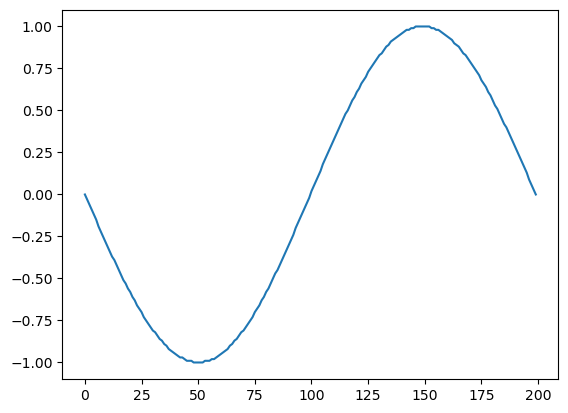

In [65]:
plt.plot(iPRC)

In [208]:
x = [1, 2, 3]
x[0:1]

[1]